In [1]:
import numpy as np
import cv2
import glob, os
import matplotlib.pyplot as plt
import PyQt5
%matplotlib inline

In [2]:
from ImageProcess import ImageProcess
from LaneFinding import Lanes

import pickle
if not os.path.exists("./data/cali_pickle.p"):
    print("Run camera_calibraton.ipynb first.")
else:    
    cali_pickle = pickle.load( open( "./data/cali_pickle.p", "rb" ))
    
ImageProcess = ImageProcess(cali_pickle)
Lanes = Lanes(cali_pickle)

In [3]:
# Read a image
img = cv2.imread('./test_images/test1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [4]:
undistorted = ImageProcess.undistort(img)
combined_binary_color, combined_binary = ImageProcess.combine_thresh(undistorted)
warped = ImageProcess.perspective(combined_binary)

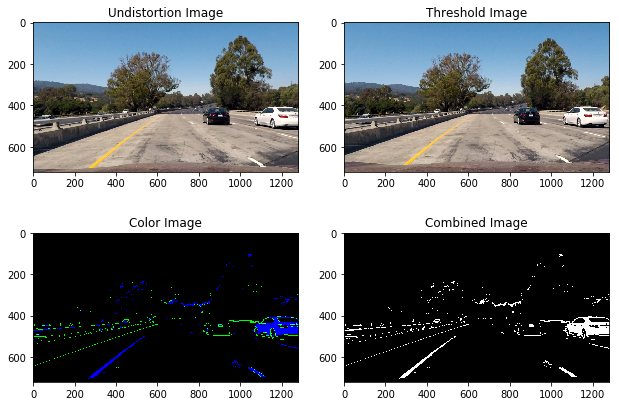

In [5]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 6))
f.tight_layout()
ax1.imshow(undistorted)
ax1.set_title('Undistortion Image', fontsize=12)
ax2.imshow(img)
ax2.set_title('Threshold Image', fontsize=12)
ax3.imshow(combined_binary_color)
ax3.set_title('Color Image', fontsize=12)
ax4.imshow(combined_binary, cmap='gray')
ax4.set_title('Combined Image', fontsize=12)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

Text(0.5,1,'Warped Image')

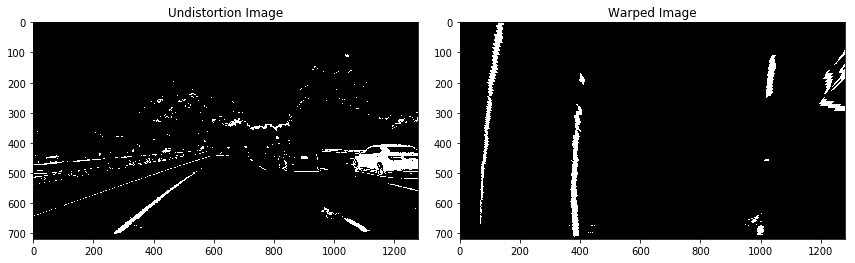

In [6]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
f.tight_layout()
ax1.imshow(combined_binary, cmap='gray')
ax1.set_title('Undistortion Image', fontsize=12)
ax2.imshow(warped, cmap='gray')
ax2.set_title('Warped Image', fontsize=12)

(720, 0)

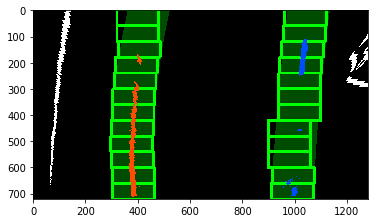

In [7]:
out_img = Lanes.find_lines_initial(warped)
plt.imshow(out_img)
plt.xlim(0, 1280)
plt.ylim(720, 0)

In [8]:
# Lines curvatures
left_curv, right_curv = Lanes.curvature()
print("Left curvature: {:.2f} m".format(left_curv))
print("Right curvature: {:.2f} m".format(right_curv))

Left curvature: 790.64 m
Right curvature: 3316.46 m


In [9]:
# Vechicle offset from the center of lane
offset, lane_width = Lanes.lane_offset()
print("Current offset from the center: {:.2f} m".format(offset))
print("Current lane width: {:.2f} m".format(lane_width))

Current offset from the center: 0.25 m
Current lane width: 3.19 m


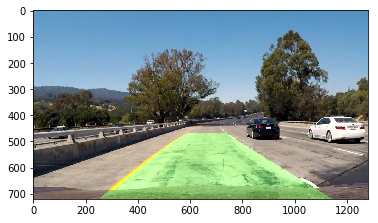

In [10]:
# Draw lane on the origial road
out_img = Lanes.draw_lane(img, warped)
plt.imshow(out_img)

### Select frame from video

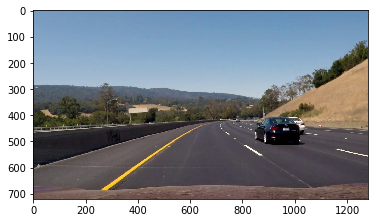

In [11]:
cap = cv2.VideoCapture('project_video.mp4')
# Select frame
cap.set(1,850);

ret, frame = cap.read()
frame_rgb = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
plt.imshow(frame_rgb)

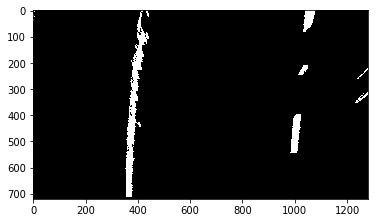

In [12]:
undistorted = ImageProcess.undistort(frame_rgb)
combined_binary_color, combined_binary = ImageProcess.combine_thresh(undistorted)
warped = ImageProcess.perspective(combined_binary)
plt.imshow(warped,cmap='gray')

(720, 0)

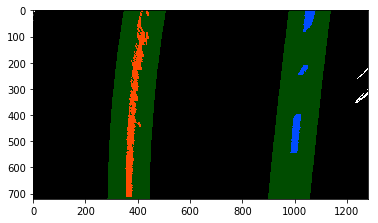

In [13]:
if (Lanes.left_fit_pre is None) or (Lanes.right_fit_pre is None):
    out_img = Lanes.find_lines_initial(warped)
else:
    out_img = Lanes.find_lines(warped)
plt.imshow(out_img)
plt.xlim(0, 1280)
plt.ylim(720, 0)

In [14]:
# Vechicle offset from the center of lane
offset, lane_width = Lanes.lane_offset()
print("Current offset from the center: {:.2f} m".format(offset))
print("Current lane width: {:.2f} m".format(lane_width))

Current offset from the center: 0.17 m
Current lane width: 3.23 m


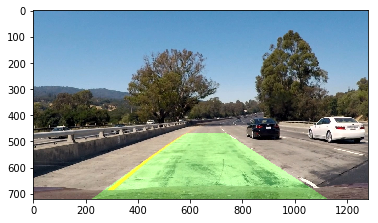

In [15]:
# Draw lane on the origial road
out_img = Lanes.draw_lane(img, warped)
plt.imshow(out_img)